# Number of Card to Draw the First Ace

In [205]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [206]:
deck_size = 52
number_of_ace = 4

In [207]:
def play_one_round(deck_size, number_of_ace):
    max_draw = deck_size-number_of_ace+1
    draw_count = 0
    deck = list(range(deck_size))
    drawn_sequence = []
    for i in range(max_draw):
        draw = deck[random.randint(0,len(deck)-1)]
        deck.remove(draw)
        drawn_sequence.append(draw)
        draw_count += 1
        # Aces are 0, 13, 26, 39 for standard deck
        if draw % (deck_size // number_of_ace) == 0:
            return draw_count, drawn_sequence


In [230]:
number_of_round = int(1e5) # 1e5 takes ~2s
probability_for_each_draw= np.zeros(deck_size-number_of_ace+1) # number of draw = array index+1

for i in range(number_of_round):
    count, _ = play_one_round(deck_size, number_of_ace)    
    probability_for_each_draw[count-1] += 1

probability_for_each_draw /= number_of_round
mean_number_of_draw = sum(list(probability_for_each_draw[i]*(i+1) for i in range(len(probability_for_each_draw))))

print(probability_for_each_draw)
print(mean_number_of_draw)
print(1+((deck_size-number_of_ace+1)*(deck_size-number_of_ace)/deck_size))

[7.592e-02 7.320e-02 6.807e-02 6.329e-02 5.964e-02 5.752e-02 5.166e-02
 4.969e-02 4.489e-02 4.302e-02 3.942e-02 3.612e-02 3.397e-02 3.119e-02
 2.934e-02 2.571e-02 2.459e-02 2.218e-02 2.001e-02 1.842e-02 1.685e-02
 1.502e-02 1.280e-02 1.212e-02 1.101e-02 9.250e-03 8.380e-03 7.410e-03
 6.250e-03 6.220e-03 4.830e-03 3.870e-03 3.460e-03 2.970e-03 2.320e-03
 2.180e-03 1.700e-03 1.550e-03 1.060e-03 8.700e-04 7.700e-04 5.100e-04
 2.700e-04 2.500e-04 1.300e-04 2.000e-05 4.000e-05 4.000e-05 0.000e+00]
10.598440000000004
46.23076923076923


In [231]:
analytical_probability_for_each_draw = np.array(list(1/13*(52-i)*(51-i)*(50-i)/51/50/49 for i in range(1,deck_size-number_of_ace+2)))

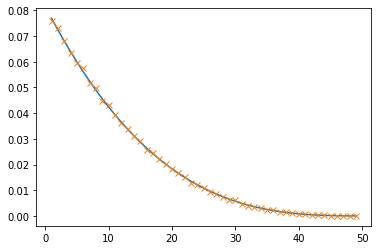

In [232]:
plt.plot(list(range(1,deck_size-number_of_ace+2)), analytical_probability_for_each_draw)
plt.plot(list(range(1,deck_size-number_of_ace+2)), probability_for_each_draw, marker='x', linestyle=' ')